# County Features 

We tried using the ACS 1 year data through Cenpy and the API and consistently got ~820 to 840 counties. 

I tried it from the API directly and from cenpy, with different years for each, and it always returned counties within that range. And, not all states had counties in there, so it wasn't a random sample (remember, Arizona had zero...) 

#### However, using the 5 year data does get us more county information! 

In [1]:
import pandas as pd
import cenpy as c
#find table that we want to query 
available = c.explorer.available()
acs_df = available[available['title'].str.contains('ACS') == True]
acs_df = acs_df[acs_df['vintage'] == 2017]
acs_df

/anaconda3/envs/learn-env/lib/python3.6/site-packages/libpysal/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


,variable_cell_limit,title,temporal,spatial,publisher,programCode,modified,keyword,distribution,description,...,c_isCube,c_isAvailable,c_isAggregate,c_groupsLink,c_geographyLink,c_examplesLink,c_dataset,c.is_cell_limit_discovery,bureauCode,accessLevel
ACSDT1Y2017,NaN,ACS 1-Year Detailed Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/grou...,https://api.census.gov/data/2017/acs/acs1/geog...,https://api.census.gov/data/2017/acs/acs1/exam...,"(acs, acs1)",NaN,NaN,NaN
ACSCP1Y2017,NaN,ACS 1-Year Comparison Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,https://api.census.gov/data/2017/acs/acs1/cpro...,"(acs, acs1, cprofile)",NaN,NaN,NaN
ACSDP1Y2017,NaN,ACS 1-Year Data Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,https://api.census.gov/data/2017/acs/acs1/prof...,"(acs, acs1, profile)",NaN,NaN,NaN
ACSSPP1Y2017,NaN,ACS 1-Year Selected Population Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-17 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",Selected Population Profiles provide broad soc...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/spp/...,https://api.census.gov/data/2017/acs/acs1/spp/...,https://api.census.gov/data/2017/acs/acs1/spp/...,"(acs, acs1, spp)",NaN,NaN,NaN
ACSST1Y2017,NaN,ACS 1-Year Subject Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-09-13 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs1/subj...,https://api.census.gov/data/2017/acs/acs1/subj...,https://api.census.gov/data/2017/acs/acs1/subj...,"(acs, acs1, subject)",NaN,NaN,NaN
ACSDT5Y2017,NaN,ACS 5-Year Detailed Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-08-21 07:11:43.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs5/grou...,https://api.census.gov/data/2017/acs/acs5/geog...,https://api.census.gov/data/2017/acs/acs5/exam...,"(acs, acs5)",NaN,NaN,NaN
ACSCP5Y2017,NaN,ACS 5-Year Comparison Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs5/cpro...,https://api.census.gov/data/2017/acs/acs5/cpro...,https://api.census.gov/data/2017/acs/acs5/cpro...,"(acs, acs5, cprofile)",NaN,NaN,NaN
ACSDP5Y2017,NaN,ACS 5-Year Data Profiles,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs5/prof...,https://api.census.gov/data/2017/acs/acs5/prof...,https://api.census.gov/data/2017/acs/acs5/prof...,"(acs, acs5, profile)",NaN,NaN,NaN
ACSST5Y2017,NaN,ACS 5-Year Subject Tables,unidentified,NaN,U.S. Census Bureau,006:004,2018-10-19 00:00:00.0,(),"{'@type': 'dcat:Distribution', 'accessURL': 'h...",The American Community Survey (ACS) is an ongo...,...,True,True,True,https://api.census.gov/data/2017/acs/acs5/subj...,https://api.census.gov/data/2017/acs/acs5/subj...,https://api.census.gov/data/2017/acs/acs5/subj...,"(acs, acs5, subject)",Na

Based on this website and other research, we want to use ACSDP5Y2017.

In [2]:
c.explorer.explain('ACSDP5Y2017')

{'ACS 5-Year Data Profiles': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. The data profiles include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts, all counties, all places and all tracts. Data profiles contain broad social, economic, housing, and demographic information. The data are presented as both counts and percentages. There are over 2,400 variables in this dataset.'}

In [3]:
con = c.base.Connection('ACSDP5Y2017')
g_unit = 'county:*'

In [4]:
#create education features list from https://api.census.gov/data/2017/acs/acs5/profile/variables.html
cols_edu = [] 
for n in range(52,68): 
    var_name = 'DP02_00'+str(n)+'PE'
    cols_edu.append(var_name)

#create internet features list
cols_internet = []
for n in range(150,153):
    var_name = 'DP02_0'+str(n)+'PE'
    cols_internet.append(var_name)

#create row names for joining and EDA
cols_req = ['NAME']


In [5]:
cols = cols_req + cols_edu + cols_internet 

In [6]:
counties_df = con.query(cols=cols, geo_unit=g_unit)
counties_df.head()

,NAME,DP02_0052PE,DP02_0053PE,DP02_0054PE,DP02_0055PE,DP02_0056PE,DP02_0057PE,DP02_0058PE,DP02_0059PE,DP02_0060PE,...,DP02_0063PE,DP02_0064PE,DP02_0065PE,DP02_0066PE,DP02_0067PE,DP02_0150PE,DP02_0151PE,DP02_0152PE,state,county
0,"Pickens County, Alabama",4416,11.8,5.7,39.2,26.8,16.5,14241,6.2,13.9,...,7.5,8.8,3.0,79.8,11.8,7620,71.0,60.9,01,107
1,"Sumter County, Alabama",4106,4.4,5.9,26.9,18.8,44.1,8244,4.7,12.6,...,7.0,10.6,7.6,82.7,18.2,5073,64.8,50.4,01,119
2,"Jefferson County, Alabama",165739,6.8,5.7,39.9,20.5,27.1,447048,3.0,7.6,...,8.1,19.4,12.5,89.4,31.9,261390,84.4,73.0,01,073
3,"Choctaw County, Alabama",2718,3.9,4.3,48.0,24.4,19.4,9449,6.6,13.3,...,9.1,7.9,3.8,80.1,11.6,5463,70.4,52.3,01,023
4,"Franklin County, Alabama",7426,3.3,6.8,49.2,23.3,17.4,20734,11.8,11.9,...,7.5,8.3,5.1,76.4,13.4,11533,74.2,60.3,01,059


In [7]:
counties_df = counties_df.rename(index=str, columns={'NAME': 'county_name', 
                                       'DP02_0052PE': '%_inschool_3+',
                                       'DP02_0053PE': '%_preschool_3+',
                                       'DP02_0054PE': '%_kinderg_3+',
                                       'DP02_0055PE': '%_elementary_3+',
                                       'DP02_0056PE': '%_highschool_3+',
                                       'DP02_0057PE': '%_college_3+',
                                       'DP02_0058PE': '%_25+',
                                       'DP02_0059PE': '%_below9th_25+',
                                       'DP02_0060PE': '%_9th-12th_25+',
                                       'DP02_0061PE': '%_hsgrad_25+',
                                       'DP02_0062PE': '%_somecollege_25+',
                                       'DP02_0063PE': '%_associates_25+',
                                       'DP02_0064PE': '%_bachelors_b25+',
                                       'DP02_0065PE': '%_gradschool_25+',
                                       'DP02_0066PE': '%_hsgrad_or+_25+',
                                       'DP02_0067PE': '%_bachelors_or+_25+',
                                       'DP02_0150PE': '%_useinternet_total_households',
                                       'DP02_0151PE': '%_havecomp_total_households',
                                       'DP02_0152PE': '%_broadband_total_households',
                                      })

In [8]:
counties_df[counties_df['county_name'].str.contains('Wyoming')]

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_associates_25+,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county
1857,"Wyoming County, New York",7920,5.7,4.3,46.4,25.3,18.3,29320,3.5,8.2,...,13.4,9.7,5.8,88.3,15.4,15686,83.8,73.1,36,121
2267,"Wyoming County, Pennsylvania",5697,5.8,4.8,42.4,25.4,21.6,19657,1.8,6.1,...,8.5,12.4,6.5,92.1,18.8,10801,84.7,78.6,42,131
2966,"Wyoming County, West Virginia",4207,6.6,7.6,49.3,24.6,11.9,15859,8.5,13.1,...,4.1,5.4,3.9,78.4,9.3,9169,71.8,63.6,54,109
3047,"Goshen County, Wyoming",2938,5.4,3.2,42.1,24.1,25.3,9449,2.0,6.6,...,11.0,15.3,9.1,91.4,24.4,5328,81.9,71.3,56,015
3048,"Uinta County, Wyoming",5557,6.8,6.3,53.9,21.6,11.5,12978,2.3,5.9,...,10.3,11.9,5.5,91.8,17.4,7705,91.2,83.8,56,041
3049,"Washakie County, Wyoming",1783,4.7,2.5,52.7,33.5,6.7,5705,2.9,8.6,...,11.3,15.4,5.6,88.5,21.0,3490,87.7,76.4,56,043
3050,"Hot Springs County, Wyoming",943,10.0,6.0,49.9,19.3,14.7,3604,1.2,6.2,...,14.1,13.3,8.3,92.5,21.6,2246,85.1,74.4,56,017
3051,"Fremont County, Wyoming",10169,9.1,5.7,45.1,21.1,19.0,26781,2.1,6.8,...,10.6,15.5,7.7,91.1,23.3,15167,86.1,71.9,56,013
3052,"Sublette County, Wyoming",2482,6.8,7.7,49.4,21.5,14.6,7051,1.6,2.1,...,9.2,19.2,6.2,96.2,25.4,3197,93.9,82.9,56,035
3053,"Weston County, Wyoming",1441,13.4,2.7,46.2,19.4,18.3,5074,1.5,6.6,...,9.1,14.1,5.7,91.9,19.8,3182,82.9,71.1,56,045


In [9]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 22 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

In [10]:
counties_df['county_code'] = counties_df['state'] + counties_df['county']

counties_df.head()

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
0,"Pickens County, Alabama",4416,11.8,5.7,39.2,26.8,16.5,14241,6.2,13.9,...,8.8,3.0,79.8,11.8,7620,71.0,60.9,01,107,01107
1,"Sumter County, Alabama",4106,4.4,5.9,26.9,18.8,44.1,8244,4.7,12.6,...,10.6,7.6,82.7,18.2,5073,64.8,50.4,01,119,01119
2,"Jefferson County, Alabama",165739,6.8,5.7,39.9,20.5,27.1,447048,3.0,7.6,...,19.4,12.5,89.4,31.9,261390,84.4,73.0,01,073,01073
3,"Choctaw County, Alabama",2718,3.9,4.3,48.0,24.4,19.4,9449,6.6,13.3,...,7.9,3.8,80.1,11.6,5463,70.4,52.3,01,023,01023
4,"Franklin County, Alabama",7426,3.3,6.8,49.2,23.3,17.4,20734,11.8,11.9,...,8.3,5.1,76.4,13.4,11533,74.2,60.3,01,059,01059


In [11]:
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 23 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null object
%_preschool_3+                    3142 non-null object
%_kinderg_3+                      3142 non-null object
%_elementary_3+                   3142 non-null object
%_highschool_3+                   3142 non-null object
%_college_3+                      3142 non-null object
%_25+                             3142 non-null object
%_below9th_25+                    3142 non-null object
%_9th-12th_25+                    3142 non-null object
%_hsgrad_25+                      3142 non-null object
%_somecollege_25+                 3142 non-null object
%_associates_25+                  3142 non-null object
%_bachelors_b25+                  3142 non-null object
%_gradschool_25+                  3142 non-null object
%_hsgrad_or+_25+                  3142 non-null object
%_bachelors_or+_25

In [12]:
counties_df['county_code'] = counties_df['county_code'].astype(int)
counties_df['state'] = counties_df['state'].astype(int)
counties_df['county'] = counties_df['county'].astype(int)
counties_df.iloc[:,1:-3] = counties_df.iloc[:,1:-3].astype(float)
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3219
Data columns (total 23 columns):
county_name                       3220 non-null object
%_inschool_3+                     3142 non-null float64
%_preschool_3+                    3142 non-null float64
%_kinderg_3+                      3142 non-null float64
%_elementary_3+                   3142 non-null float64
%_highschool_3+                   3142 non-null float64
%_college_3+                      3142 non-null float64
%_25+                             3142 non-null float64
%_below9th_25+                    3142 non-null float64
%_9th-12th_25+                    3142 non-null float64
%_hsgrad_25+                      3142 non-null float64
%_somecollege_25+                 3142 non-null float64
%_associates_25+                  3142 non-null float64
%_bachelors_b25+                  3142 non-null float64
%_gradschool_25+                  3142 non-null float64
%_hsgrad_or+_25+                  3142 non-null float64
%_b

In [13]:
counties_df[pd.isnull(counties_df).any(axis=1)]

,county_name,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,%_25+,%_below9th_25+,%_9th-12th_25+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
3142,"Jayuya Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,73,72073
3143,"Quebradillas Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,115,72115
3144,"Guayama Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,57,72057
3145,"Guánica Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,55,72055
3146,"Rincón Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,117,72117
3147,"Villalba Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,149,72149
3148,"Aguas Buenas Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,7,72007
3149,"Bayamón Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,21,72021
3150,"Hormigueros Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,67,72067
3151,"Manatí Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,91,72091


In [14]:
counties_df = counties_df.dropna()
counties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, 0 to 3141
Data columns (total 23 columns):
county_name                       3142 non-null object
%_inschool_3+                     3142 non-null float64
%_preschool_3+                    3142 non-null float64
%_kinderg_3+                      3142 non-null float64
%_elementary_3+                   3142 non-null float64
%_highschool_3+                   3142 non-null float64
%_college_3+                      3142 non-null float64
%_25+                             3142 non-null float64
%_below9th_25+                    3142 non-null float64
%_9th-12th_25+                    3142 non-null float64
%_hsgrad_25+                      3142 non-null float64
%_somecollege_25+                 3142 non-null float64
%_associates_25+                  3142 non-null float64
%_bachelors_b25+                  3142 non-null float64
%_gradschool_25+                  3142 non-null float64
%_hsgrad_or+_25+                  3142 non-null float64
%_b

In [15]:
counties_df.tail().T

,3137,3138,3139,3140,3141
county_name,"Rusk County, Wisconsin","Vilas County, Wisconsin","Shawano County, Wisconsin","Juneau County, Wisconsin","Washington County, Wisconsin"
%_inschool_3+,2690,3495,8769,5183,31410
%_preschool_3+,6.4,6.7,6.5,4.8,5.8
%_kinderg_3+,3.8,5.8,5.7,7.2,5.5
%_elementary_3+,53.5,46.2,46.4,46.5,44.6
%_highschool_3+,25.1,23.1,24.3,25.9,24.4
%_college_3+,11.1,18.1,17,15.6,19.8
%_25+,10268,16692,29299,19276,93734
%_below9th_25+,4.8,1,2.5,3.6,1.8
%_9th-12th_25+,8.2,6.4,6.5,9.4,3.8


# Overdoses by County

In [16]:
od = pd.read_csv('2013-2017 Overdose Information.txt', delimiter='\t')
od = od.drop(['Notes'], axis=1)

od_reliable = od.drop(od[od['Crude Rate']=='Suppressed'].index)

od_reliable = od_reliable.drop(od_reliable[od_reliable['Crude Rate']=='Unreliable'].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['Deaths']=='Missing'].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['Deaths'].isna()].index)
od_reliable = od_reliable.drop(od_reliable[od_reliable['County Code'].isna()].index)
od_reliable.head()

,County,County Code,Deaths,Population,Crude Rate,% of Total Deaths
0,"Autauga County, AL",1001.0,47,276908,16.9731,0.0103%
1,"Baldwin County, AL",1003.0,253,1020551,24.7905,0.0554%
3,"Bibb County, AL",1007.0,27,112912,23.9124,0.0059%
4,"Blount County, AL",1009.0,88,288981,30.4518,0.0193%
7,"Calhoun County, AL",1015.0,132,577611,22.8528,0.0289%


In [17]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null float64
Deaths               2016 non-null object
Population           2016 non-null object
Crude Rate           2016 non-null object
% of Total Deaths    2016 non-null object
dtypes: float64(1), object(5)
memory usage: 110.2+ KB


In [18]:
od_reliable['County Code'] = od_reliable['County Code'].astype(int)
od_reliable['Deaths'] = od_reliable['Deaths'].astype(int)
od_reliable['Population'] = od_reliable['Population'].astype(int)
od_reliable['Crude Rate'] = od_reliable['Crude Rate'].astype(float)

In [19]:
od_reliable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 110.2+ KB


In [20]:
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].str.replace("%", "")
od_reliable['% of Total Deaths'] = od_reliable['% of Total Deaths'].astype(float)

In [21]:
od_df = od_reliable

In [22]:
od_df.head()

,County,County Code,Deaths,Population,Crude Rate,% of Total Deaths
0,"Autauga County, AL",1001,47,276908,16.9731,0.0103
1,"Baldwin County, AL",1003,253,1020551,24.7905,0.0554
3,"Bibb County, AL",1007,27,112912,23.9124,0.0059
4,"Blount County, AL",1009,88,288981,30.4518,0.0193
7,"Calhoun County, AL",1015,132,577611,22.8528,0.0289


In [23]:
od_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 3144
Data columns (total 6 columns):
County               2016 non-null object
County Code          2016 non-null int64
Deaths               2016 non-null int64
Population           2016 non-null int64
Crude Rate           2016 non-null float64
% of Total Deaths    2016 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 110.2+ KB


# Joining the CDC and Census Data

In [24]:
counties_data = od_df.merge(counties_df, how='inner', left_on='County Code', right_on='county_code')

In [25]:
counties_data.drop(['County Code', 'county_name'], axis=1, inplace=True)

In [26]:
counties_data

,County,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
0,"Autauga County, AL",47,276908,16.9731,0.0103,13438.0,3.9,7.1,46.3,24.8,...,14.5,10.5,87.7,25.0,21054.0,86.2,76.6,1,1,1001
1,"Baldwin County, AL",253,1020551,24.7905,0.0554,44265.0,6.2,4.9,46.5,24.3,...,20.4,10.3,90.2,30.7,76133.0,86.9,74.5,1,3,1003
2,"Bibb County, AL",27,112912,23.9124,0.0059,4626.0,3.0,4.9,44.0,28.7,...,8.1,5.1,82.1,13.2,6916.0,74.8,62.0,1,7,1007
3,"Blount County, AL",88,288981,30.4518,0.0193,12428.0,3.9,4.4,49.3,25.9,...,8.7,4.4,79.8,13.1,20690.0,78.2,65.8,1,9,1009
4,"Calhoun County, AL",132,577611,22.8528,0.0289,27798.0,6.2,5.3,41.4,20.6,...,10.2,7.6,83.2,17.9,45099.0,82.9,71.0,1,15,1015
5,"Chambers County, AL",34,169917,20.0098,0.0074,7081.0,5.6,3.3,48.2,21.5,...,9.0,4.3,80.9,13.3,13694.0,72.7,62.8,1,17,1017
6,"Cherokee County, AL",40,129681,30.8449,0.0088,5109.0,3.8,4.9,47.8,27.6,...,6.6,5.9,79.5,12.5,10795.0,79.4,67.5,1,19,1019
7,"Chilton County, AL",42,219833,19.1054,0.0092,9659.0,4.9,7.2,48.6,24.0,...,9.5,5.6,81.8,15.1,16768.0,73.8,56.6,1,21,1021
8,"Coffee County, AL",39,256158,15.2250,0.0085,11864.0,4.5,6.3,45.0,25.9,...,14.7,8.0,85.4,22.7,19620.0,84.1,75.3,1,31,1031
9,"Colbert County, AL",39,272133,14.3312,0.0085,11445.0,3.9,4.5,46.8,24.6,...,11.5,7.3,83.9,18.8,21983.0,80.3,65.9,1,33,1033


In [27]:
import numpy as np

In [28]:
counties_data.describe()

,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,%_college_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
count,2015.000000,2.015000e+03,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,221.504218,7.697052e+05,31.182003,0.048531,3.934429e+04,5.909628,5.365856,43.201241,22.344268,23.178759,...,14.497519,8.366352,86.622878,22.862829,5.689684e+04,83.134839,72.260943,30.905211,97.572208,31002.783127
std,519.332693,2.003106e+06,13.944111,0.113782,1.059416e+05,1.509989,1.347735,6.256521,3.620372,10.096346,...,5.816358,4.557504,5.749122,9.954506,1.397341e+05,6.709357,8.962677,15.327295,106.438226,15344.335467
min,20.000000,2.092900e+04,7.899600,0.004400,1.199000e+03,1.400000,1.100000,13.200000,5.900000,3.700000,...,2.800000,1.900000,58.200000,4.900000,1.114000e+03,49.800000,38.600000,1.000000,1.000000,1001.000000
25%,36.000000,1.354240e+05,21.744650,0.007900,5.998000e+03,4.900000,4.600000,40.700000,20.800000,16.900000,...,10.100000,5.300000,83.400000,15.500000,1.041150e+04,79.400000,66.800000,18.000000,31.000000,18132.000000
50%,70.000000,2.421540e+05,28.348700,0.015300,1.144500e+04,5.900000,5.300000,44.000000,22.700000,20.700000,...,13.200000,7.000000,87.700000,20.200000,1.853700e+04,83.800000,72.900000,30.000000,73.000000,30111.000000
75%,180.500000,6.167530e+05,37.341300,0.039550,3.134150e+04,6.800000,6.100000,47.100000,24.600000,26.400000,...,17.900000,10.300000,90.800000,28.150000,4.621400e+04,87.850000,78.600000,45.000000,125.000000,45052.000000
max,10349.000000,5.060549e+07,156.161100,2.267400,2.704769e+06,13.900000,11.800000,67.800000,37.900000,76.400000,...,39.000000,40.300000,98.000000,74.100000,3.295198e+06,97.800000,94.600000,56.000000,840.000000,56041.000000


In [29]:
counties_data.sort_values(by=['Crude Rate'], ascending=False)

,County,Deaths,Population,Crude Rate,% of Total Deaths,%_inschool_3+,%_preschool_3+,%_kinderg_3+,%_elementary_3+,%_highschool_3+,...,%_bachelors_b25+,%_gradschool_25+,%_hsgrad_or+_25+,%_bachelors_or+_25+,%_useinternet_total_households,%_havecomp_total_households,%_broadband_total_households,state,county,county_code
1078,"Rio Arriba County, NM",310,198513,156.1611,0.0679,9297.0,7.4,5.2,44.5,20.0,...,12.0,6.5,85.3,18.5,12852.0,58.6,49.1,35,39,35039
1004,"Roosevelt County, MT",65,56336,115.3792,0.0142,2961.0,6.3,8.1,51.5,20.6,...,11.1,4.3,83.3,15.5,3203.0,71.8,64.7,30,85,30085
1972,"Menominee County, WI",26,22560,115.2482,0.0057,1334.0,9.7,9.7,42.4,32.4,...,10.0,5.9,91.3,15.9,1354.0,71.0,64.9,55,78,55078
177,"Huerfano County, CO",34,32812,103.6206,0.0074,1209.0,3.7,8.4,50.3,19.4,...,15.1,8.5,90.5,23.6,3173.0,77.1,60.6,8,55,8055
1901,"Cabell County, WV",494,482031,102.4830,0.1082,23856.0,5.0,3.7,37.0,15.9,...,14.0,11.7,87.6,25.7,40239.0,82.7,67.5,54,11,54011
1913,"McDowell County, WV",101,98756,102.2723,0.0221,3111.0,6.8,5.4,51.8,27.7,...,3.0,1.9,65.3,4.9,7702.0,68.7,59.4,54,47,54047
1531,"Corson County, SD",21,20929,100.3392,0.0046,1199.0,9.3,5.0,56.8,25.3,...,15.1,2.6,81.9,17.7,1239.0,59.8,52.5,46,31,46031
1245,"Sioux County, ND",22,22067,99.6964,0.0048,1479.0,9.3,6.1,51.5,21.3,...,12.5,4.8,86.2,17.3,1114.0,68.3,54.2,38,85,38085
1538,"Todd County, SD",48,50043,95.9175,0.0105,3435.0,8.5,7.2,51.8,22.6,...,10.5,5.7,78.0,16.2,2768.0,62.1,47.0,46,121,46121
1075,"McKinley County, NM",343,371601,92.3033,0.0751,20926.0,6.5,5.5,46.8,23.6,...,5.9,4.9,74.8,10.8,19764.0,54.9,39.6,35,31,35031


In [30]:
import matplotlib.pyplot as plt
plt.scatter(counties_data['state'], counties_data['Crude Rate'])

(array([ 14.,  47., 131., 181., 215., 207., 236., 195., 158., 134., 101.,
        102.,  73.,  46.,  38.,  24.,  26.,  14.,  18.,   6.,  10.,   7.,
          5.,   7.,   2.,   3.,   3.,   1.,   2.,   1.,   1.,   3.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  7.8996 ,  10.86483,  13.83006,  16.79529,  19.76052,  22.72575,
         25.69098,  28.65621,  31.62144,  34.58667,  37.5519 ,  40.51713,
         43.48236,  46.44759,  49.41282,  52.37805,  55.34328,  58.30851,
         61.27374,  64.23897,  67.2042 ,  70.16943,  73.13466,  76.09989,
         79.06512,  82.03035,  84.99558,  87.96081,  90.92604,  93.89127,
         96.8565 ,  99.82173, 102.78696, 105.75219, 108.71742, 111.68265,
        114.64788, 117.61311, 120.57834, 123.54357, 126.5088 , 129.47403,
        132.43926, 135.40449, 138.36972, 141.33495, 144.30018, 147.26541,
        150.23064, 153.19587, 156.1611 ]),
 <a list of 50 Patch ob

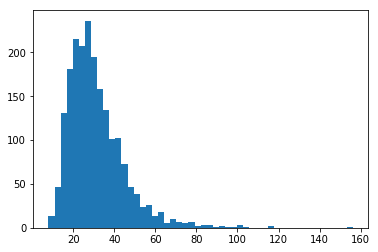

In [31]:
plt.hist(counties_data['Crude Rate'], bins=50)

(array([1.83e+03, 9.80e+01, 3.80e+01, 2.30e+01, 1.00e+01, 6.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.0044 , 0.11755, 0.2307 , 0.34385, 0.457  , 0.57015, 0.6833 ,
        0.79645, 0.9096 , 1.02275, 1.1359 , 1.24905, 1.3622 , 1.47535,
        1.5885 , 1.70165, 1.8148 , 1.92795, 2.0411 , 2.15425, 2.2674 ]),
 <a list of 20 Patch objects>)

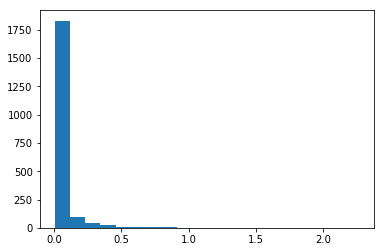

In [32]:
plt.hist(counties_data['% of Total Deaths'], bins=20)

In [33]:
counties_data.loc[(counties_data['Crude Rate'] < 48), 'high_risk'] = 0
counties_data.loc[(counties_data['Crude Rate'] >= 48), 'high_risk'] = 1

In [34]:
counties_data.head().T

,0,1,2,3,4
County,"Autauga County, AL","Baldwin County, AL","Bibb County, AL","Blount County, AL","Calhoun County, AL"
Deaths,47,253,27,88,132
Population,276908,1020551,112912,288981,577611
Crude Rate,16.9731,24.7905,23.9124,30.4518,22.8528
% of Total Deaths,0.0103,0.0554,0.0059,0.0193,0.0289
%_inschool_3+,13438,44265,4626,12428,27798
%_preschool_3+,3.9,6.2,3,3.9,6.2
%_kinderg_3+,7.1,4.9,4.9,4.4,5.3
%_elementary_3+,46.3,46.5,44,49.3,41.4
%_highschool_3+,24.8,24.3,28.7,25.9,20.6


# Split our Data 

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [36]:
X = counties_data.drop(columns=['high_risk','county_code','state','county',
                                'County','Deaths','Population','Crude Rate','% of Total Deaths' 
                                ])
y = counties_data['high_risk']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# Modeling with Logistic Regression

In [38]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, log_loss
from sklearn.decomposition import PCA
from sklearn_pandas.pipeline import Pipeline as Pipe
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [39]:
pipe = Pipe(steps=[
    ('scaler' , StandardScaler()),
    ('logreg' , LogisticRegression(penalty= 'l1', fit_intercept = True))
])

In [40]:
pipe.fit(X_train, y_train)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [41]:
y_hat_train_probs = pipe.predict_proba(X_train)
y_hat_test_probs = pipe.predict_proba(X_test)
y_hat_train_probs

array([[0.46113656, 0.53886344],
       [0.88146176, 0.11853824],
       [0.72750115, 0.27249885],
       ...,
       [0.80232827, 0.19767173],
       [0.92796887, 0.07203113],
       [0.89410538, 0.10589462]])

In [42]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
    
y_hat_test_1_probs = pipe.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_1_probs)

y_hat_train_1_probs = pipe.predict_proba(X_train)[:,1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_hat_train_1_probs)
print(f"Train ROC/AUC Score: {roc_auc_score(y_train, y_hat_train_1_probs)}") 
print(f"Test ROC/AUC Score: {roc_auc_score(y_test, y_hat_test_1_probs)}")

Train ROC/AUC Score: 0.7634591611094667
Test ROC/AUC Score: 0.7648633417864187


AUC: 0.7648633417864187


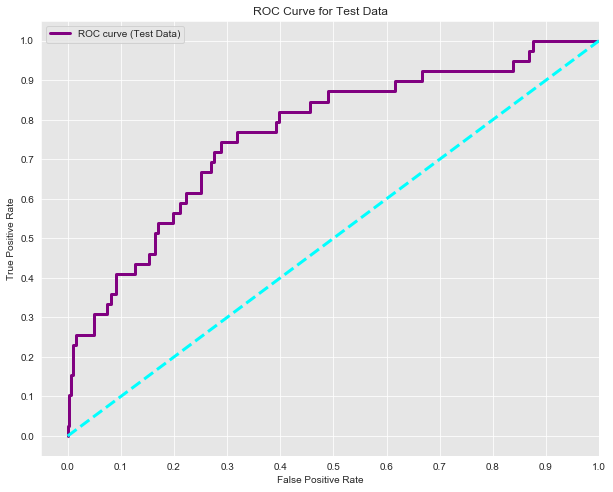

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 3 #linewidth
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='ROC curve (Test Data)') #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='cyan', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.legend(loc="upper left")
print('AUC: {}'.format(roc_auc_score(y_test, y_hat_test_1_probs)))
plt.show()

We are okay with a higher false positive rate, sacrificing accuracy for recall (capturing more of the actual positives). 

In [44]:
print(f"ROC/AUC score:{roc_auc_score(y_test, y_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(y_test, y_hat_test_1_probs)}. Remember this is to compare models!")
print(f"Accuracy score:{accuracy_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(y_test, y_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(y_test, y_hat_test_1_probs>=.5)}")

ROC/AUC score:0.7648633417864187
Log Loss:0.2723810031103456. Remember this is to compare models!
Accuracy score:0.9081885856079405
Precision score:0.75
Recall score:0.07692307692307693
f1 score:0.13953488372093026


In [45]:
print(f"We predict {sum(y_hat_test_1_probs>=.5)} high risk counties out of {len(y_hat_test_1_probs)}.")
print(f"There are actually {sum(y_test==1)} high risk counties out of {len(y_test)}.")

We predict 4 high risk counties out of 403.
There are actually 39 high risk counties out of 403.


We set our threshold to .2. If there is a 20% probability that you are in a high-risk county, you will be labeled as high-risk.

In [46]:
print(f"ROC/AUC score:{roc_auc_score(y_test, (y_hat_test_1_probs>=.2))}")
print(f"Log Loss:{log_loss(y_test, y_hat_test_1_probs>=.2)} - remember this is to compare models!")
print(f"Accuracy score:{accuracy_score(y_test, (y_hat_test_1_probs>=.2))}")
print(f"Precision score:{precision_score(y_test, (y_hat_test_1_probs>=.2))}")
print(f"Recall score:{recall_score(y_test, (y_hat_test_1_probs>=.2))}")
print(f"f1 score:{f1_score(y_test, (y_hat_test_1_probs>=.2))}")

ROC/AUC score:0.6263736263736264
Log Loss:4.028135192331033 - remember this is to compare models!
Accuracy score:0.8833746898263027
Precision score:0.375
Recall score:0.3076923076923077
f1 score:0.3380281690140845


# Feature Engineering: One Hot Encode States

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
counties_data['state'].value_counts()

48    123
13     92
21     90
37     89
51     88
39     84
47     80
18     77
26     71
17     64
55     64
42     63
29     63
36     60
12     60
40     56
6      55
27     47
1      42
22     41
54     41
28     41
5      39
45     39
53     36
8      35
41     30
20     29
19     28
35     25
24     24
16     21
34     21
30     20
49     18
23     16
4      14
31     14
56     13
46     13
38     13
25     13
50     12
32     10
33     10
2      10
9       8
44      5
15      4
10      3
11      1
Name: state, dtype: int64

In [49]:
state_cols = counties_data["state"].values.reshape(-1, 1)
state_cols[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [50]:
encoder = OneHotEncoder().fit(state_cols)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [51]:
encoder.get_feature_names(["state_cols"])

array(['state_cols_1.0', 'state_cols_2.0', 'state_cols_4.0',
       'state_cols_5.0', 'state_cols_6.0', 'state_cols_8.0',
       'state_cols_9.0', 'state_cols_10.0', 'state_cols_11.0',
       'state_cols_12.0', 'state_cols_13.0', 'state_cols_15.0',
       'state_cols_16.0', 'state_cols_17.0', 'state_cols_18.0',
       'state_cols_19.0', 'state_cols_20.0', 'state_cols_21.0',
       'state_cols_22.0', 'state_cols_23.0', 'state_cols_24.0',
       'state_cols_25.0', 'state_cols_26.0', 'state_cols_27.0',
       'state_cols_28.0', 'state_cols_29.0', 'state_cols_30.0',
       'state_cols_31.0', 'state_cols_32.0', 'state_cols_33.0',
       'state_cols_34.0', 'state_cols_35.0', 'state_cols_36.0',
       'state_cols_37.0', 'state_cols_38.0', 'state_cols_39.0',
       'state_cols_40.0', 'state_cols_41.0', 'state_cols_42.0',
       'state_cols_44.0', 'state_cols_45.0', 'state_cols_46.0',
       'state_cols_47.0', 'state_cols_48.0', 'state_cols_49.0',
       'state_cols_50.0', 'state_cols_51.0', 's

In [52]:
ohe = pd.DataFrame(encoder.transform(state_cols).toarray(),
                   columns=encoder.get_feature_names(["state_cols"]))

In [53]:
ohe.head()

,state_cols_1.0,state_cols_2.0,state_cols_4.0,state_cols_5.0,state_cols_6.0,state_cols_8.0,state_cols_9.0,state_cols_10.0,state_cols_11.0,state_cols_12.0,...,state_cols_46.0,state_cols_47.0,state_cols_48.0,state_cols_49.0,state_cols_50.0,state_cols_51.0,state_cols_53.0,state_cols_54.0,state_cols_55.0,state_cols_56.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
counties_encoded = pd.concat([counties_data.drop("state", axis=1), ohe], axis=1)
counties_encoded.head().T

,0,1,2,3,4
County,"Autauga County, AL","Baldwin County, AL","Bibb County, AL","Blount County, AL","Calhoun County, AL"
Deaths,47,253,27,88,132
Population,276908,1020551,112912,288981,577611
Crude Rate,16.9731,24.7905,23.9124,30.4518,22.8528
% of Total Deaths,0.0103,0.0554,0.0059,0.0193,0.0289
%_inschool_3+,13438,44265,4626,12428,27798
%_preschool_3+,3.9,6.2,3,3.9,6.2
%_kinderg_3+,7.1,4.9,4.9,4.4,5.3
%_elementary_3+,46.3,46.5,44,49.3,41.4
%_highschool_3+,24.8,24.3,28.7,25.9,20.6


# Split our Encoded Data 

In [55]:
Xe = counties_encoded.drop(columns=['high_risk','county_code','county',
                                'County','Deaths','Population','Crude Rate','% of Total Deaths' 
                                ])
ye = counties_encoded['high_risk']

In [56]:
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe,ye, test_size=.2)

# Modeling with Logistic Regression

In [57]:
pipe2 = Pipe(steps=[
    ('scaler' , StandardScaler()),
    ('logreg' , LogisticRegression(penalty= 'l1', fit_intercept = True))
])

In [58]:
pipe2.fit(Xe_train, ye_train)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [59]:
ye_hat_train_probs = pipe2.predict_proba(Xe_train)
ye_hat_test_probs = pipe2.predict_proba(Xe_test)
ye_hat_train_probs

array([[9.94842768e-01, 5.15723198e-03],
       [9.61324472e-01, 3.86755280e-02],
       [9.99162617e-01, 8.37382994e-04],
       ...,
       [9.94240674e-01, 5.75932616e-03],
       [9.47495435e-01, 5.25045652e-02],
       [9.49536845e-01, 5.04631554e-02]])

In [60]:
ye_hat_test_1_probs = pipe2.predict_proba(Xe_test)[:,1]
fpre, tpre, thresholdse = roc_curve(ye_test, ye_hat_test_1_probs)

ye_hat_train_1_probs = pipe2.predict_proba(Xe_train)[:,1]
train_fpre, train_tpre, train_thresholdse = roc_curve(ye_train, ye_hat_train_1_probs)
print(f"Train ROC/AUC Score: {roc_auc_score(ye_train, ye_hat_train_1_probs)}") 
print(f"Test ROC/AUC Score: {roc_auc_score(ye_test, ye_hat_test_1_probs)}")

Train ROC/AUC Score: 0.9146088680605623
Test ROC/AUC Score: 0.8855990068280571


AUC: 0.8855990068280571


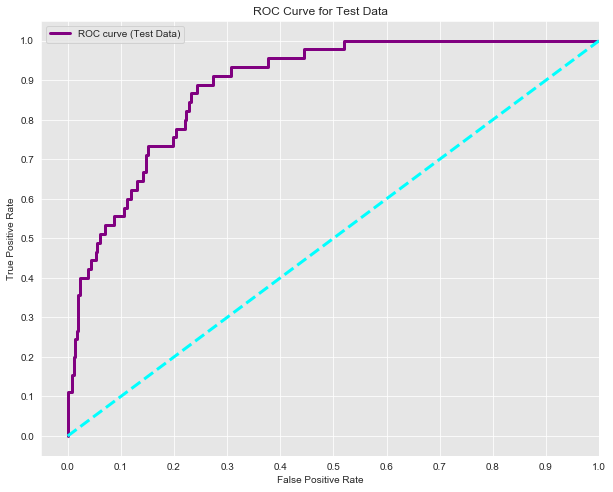

In [61]:
#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 3 #linewidth
plt.plot(fpre, tpre, color='purple',
         lw=lw, label='ROC curve (Test Data)') #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='cyan', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.legend(loc="upper left")
print('AUC: {}'.format(roc_auc_score(ye_test, ye_hat_test_1_probs)))
plt.show()

We are okay with a higher false positive rate, sacrificing accuracy for recall (capturing more of the actual positives). 

In [62]:
print(f"ROC/AUC score:{roc_auc_score(ye_test, ye_hat_test_1_probs)}")
print(f"Log Loss:{log_loss(ye_test, ye_hat_test_1_probs)}. Remember this is to compare models!")
print(f"Accuracy score:{accuracy_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Precision score:{precision_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"Recall score:{recall_score(ye_test, ye_hat_test_1_probs>=.5)}")
print(f"f1 score:{f1_score(ye_test, ye_hat_test_1_probs>=.5)}")

ROC/AUC score:0.8855990068280571
Log Loss:0.2374215846325587. Remember this is to compare models!
Accuracy score:0.9007444168734491
Precision score:0.631578947368421
Recall score:0.26666666666666666
f1 score:0.37500000000000006


In [63]:
print(f"We predict {sum(ye_hat_test_1_probs>=.28)} high risk counties out of {len(ye_hat_test_1_probs)}.")
print(f"There are actually {sum(ye_test==1)} high risk counties out of {len(ye_test)}.")

We predict 45 high risk counties out of 403.
There are actually 45 high risk counties out of 403.


We set our threshold to .28. If there is a 28% probability that you are in a high-risk county, you will be labeled as high-risk.

In [64]:
print(f"ROC/AUC score:{roc_auc_score(ye_test, ye_hat_test_1_probs>=.28)}")
print(f"Log Loss:{log_loss(ye_test, ye_hat_test_1_probs>=.28)}. Remember this is to compare models!")
print(f"Accuracy score:{accuracy_score(ye_test, ye_hat_test_1_probs>=.28)}")
print(f"Precision score:{precision_score(ye_test, ye_hat_test_1_probs>=.28)}")
print(f"Recall score:{recall_score(ye_test, ye_hat_test_1_probs>=.28)}")
print(f"f1 score:{f1_score(ye_test, ye_hat_test_1_probs>=.28)}")

ROC/AUC score:0.7248292985723154
Log Loss:3.771026681189912. Remember this is to compare models!
Accuracy score:0.890818858560794
Precision score:0.5111111111111111
Recall score:0.5111111111111111
f1 score:0.5111111111111111


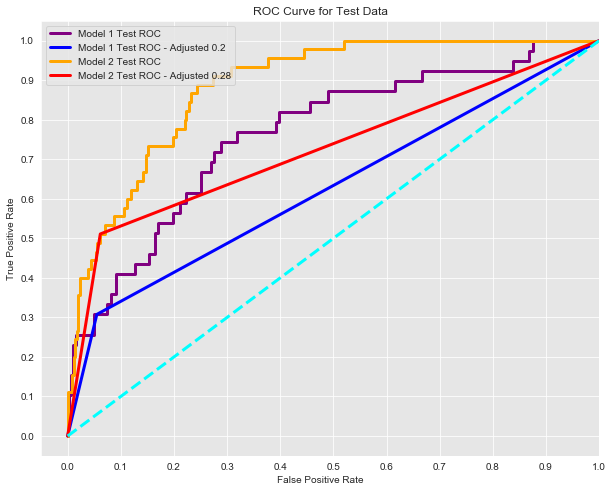

In [68]:
#PLOT
#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 3 #linewidth
#MODEL 1
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='Model 1 Test ROC')
#MODEL 1 w/ Threshold = 0.2
fprT, tprT, thresholdsT = roc_curve(y_test, y_hat_test_1_probs>=0.2)
plt.plot(fprT, tprT, color='blue',
         lw=lw, label='Model 1 Test ROC - Adjusted 0.2')

#################
#MODEL 2
plt.plot(fpre, tpre, color='orange',
         lw=lw, label='Model 2 Test ROC')
#MODEL 2 w/ Threshold = 0.28
fpreT, tpreT, thresholdseT = roc_curve(ye_test, ye_hat_test_1_probs>=0.28)
plt.plot(fpreT, tpreT, color='red',
         lw=lw, label='Model 2 Test ROC - Adjusted 0.28')

 #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='cyan', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.legend(loc="upper left")
#print('AUC: {}'.format(roc_auc_score(ye_test, ye_hat_test_1_probs)))
plt.show()

In [75]:
len(thresholdse)


68

# Random Forest 